In [65]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import pickle

In [2]:
df = pd.read_csv('Country-data.csv')

In [3]:
df.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
X = pd.get_dummies(df, columns = ['country'])

In [6]:
X.head(10)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country_Afghanistan,...,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela,country_Vietnam,country_Yemen,country_Zambia
0,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,1,...,0,0,0,0,0,0,0,0,0,0
1,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,0,...,0,0,0,0,0,0,0,0,0,0
2,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,0,...,0,0,0,0,0,0,0,0,0,0
3,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,0,...,0,0,0,0,0,0,0,0,0,0
4,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,0,...,0,0,0,0,0,0,0,0,0,0
5,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,0,...,0,0,0,0,0,0,0,0,0,0
6,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,0,...,0,0,0,0,0,0,0,0,0,0
7,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,0,...,0,0,0,0,0,0,0,0,0,0
8,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,0,...,0,0,0,0,0,0,0,0,0,0
9,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
transformer = RobustScaler().fit(X)
X_train = transformer.transform(X)
X_train

array([[ 1.31662024, -0.90744102,  0.3423913 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.05013928, -0.25408348,  0.0625    , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.14856082,  0.12341198, -0.58423913, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.07428041,  1.3430127 ,  0.14130435, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.68709378, -0.1814882 , -0.30978261, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.18477252,  0.07259528, -0.11684783, ...,  0.        ,
         0.        ,  1.        ]])

In [8]:
X_train

array([[ 1.31662024, -0.90744102,  0.3423913 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.05013928, -0.25408348,  0.0625    , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.14856082,  0.12341198, -0.58423913, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.07428041,  1.3430127 ,  0.14130435, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.68709378, -0.1814882 , -0.30978261, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.18477252,  0.07259528, -0.11684783, ...,  0.        ,
         0.        ,  1.        ]])

In [9]:
X_train.shape

(167, 176)

In [10]:
K=3 #number of clusters 4
iterations = 500 #number of iterations are 100

In [11]:
import random

In [70]:
def Kmeans(X,K,iterations):
    m,n = X.shape
    centroids=np.array([])
    centroids = centroids.reshape(n,0)
    for k in range(K):
        centroids=np.c_[centroids,X[random.randint(0,m-1)]]
    for i in range(iterations):
        sum_euclid = 0
        euclid = np.array([]).reshape(m,0)
        for k in range(K):
            dist=np.sum((X-centroids[:,k])**2,axis=1)
            sum_euclid = sum_euclid + np.sum(dist)
            euclid=np.c_[euclid,dist]
        C=np.argmin(euclid,axis=1)+1
        cent={}

        for k in range(K):
            cent[k+1]=np.array([]).reshape(n,0)
        for k in range(m):
            cent[C[k]]=np.c_[cent[C[k]],X[k]]
        for k in range(K):
            cent[k+1]=cent[k+1].T
        for k in range(K):
            centroids[:,k]=np.mean(cent[k+1],axis=0)
        final=cent
    return final,sum_euclid
    

In [75]:
dict_models = {}

In [79]:
#Random initialization step
for i in range(15):
    final,sum_euclid = Kmeans(X_train,K,iterations)
    dict_models[i] = final;
    print("iteration " + str(i) +" "+ str(sum_euclid))

iteration 0 7465.447654598664
iteration 1 7133.053791500133
iteration 2 7602.463127077166
iteration 3 16193.086488511328
iteration 4 7492.686255785743
iteration 5 7492.686255785744
iteration 6 7492.686255785743
iteration 7 7543.678385514337
iteration 8 7492.686255785743
iteration 9 7492.686255785743
iteration 10 7533.312124594808
iteration 11 7492.686255785743
iteration 12 7492.686255785743
iteration 13 7492.686255785743
iteration 14 7492.686255785744


In [80]:
model_final = dict_models[1]

In [81]:
model_final

{1: array([[ 1.31662024, -0.90744102,  0.3423913 , ...,  0.        ,
          0.        ,  0.        ],
        [-0.05013928, -0.25408348,  0.0625    , ...,  0.        ,
          0.        ,  0.        ],
        [-0.16713092,  0.38112523, -0.07880435, ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [-0.16155989, -0.31578947,  0.55163043, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.18384401,  0.42105263, -0.29076087, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.07428041,  1.3430127 ,  0.14130435, ...,  1.        ,
          0.        ,  0.        ]]),
 2: array([[ 0.14856082,  0.12341198, -0.58423913, ...,  0.        ,
          0.        ,  0.        ],
        [ 1.85143918,  0.99092559, -0.94293478, ...,  0.        ,
          0.        ,  0.        ],
        [-0.08913649, -0.58439201,  0.48369565, ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [-0.04085422, -0.23593466, -0.38315217, 

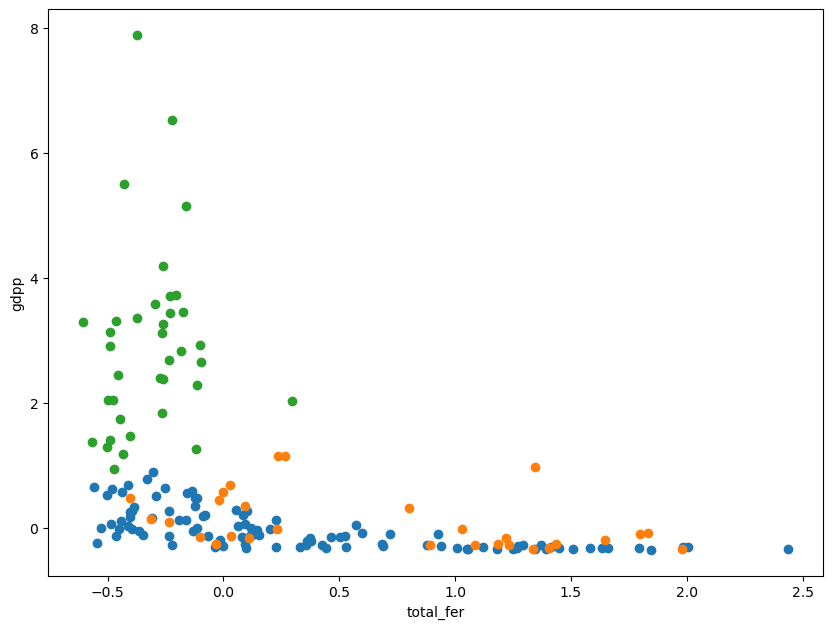

In [89]:
for k in range(K):
        plt.scatter(model_final[k+1][:,7],model_final[k+1][:,8])

plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
plt.xlabel('total_fer')
plt.ylabel('gdpp')
plt.show()

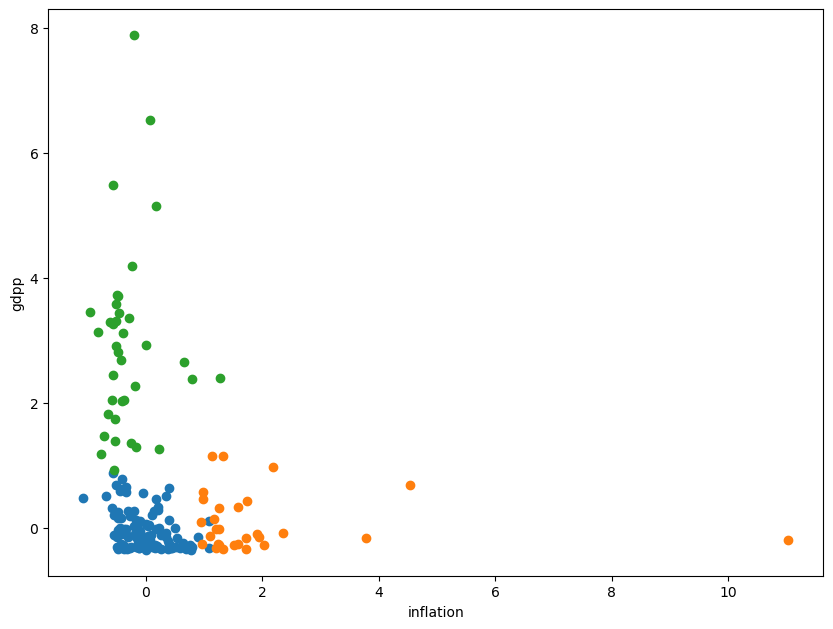

In [90]:
for k in range(K):
        plt.scatter(model_final[k+1][:,5],model_final[k+1][:,8])

plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
plt.xlabel('inflation')
plt.ylabel('gdpp')
plt.show()

# PCA 

In [17]:
X_new = df.drop('country',1)

In [18]:
X_new

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [19]:
X_train_new = StandardScaler().fit_transform(X_new)

In [20]:
X_train_new

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [21]:
X_train_new.shape

(167, 9)

In [22]:
cov_mat = np.cov(X_train_new , rowvar = False)

In [23]:
cov_mat

array([[ 1.0060241 , -0.32000945, -0.2016093 , -0.12797725, -0.52747354,
         0.29001277, -0.89201752,  0.85358942, -0.485942  ],
       [-0.32000945,  1.0060241 , -0.11509761,  0.74182289,  0.51989676,
        -0.10794074,  0.3182181 , -0.32193832,  0.42124719],
       [-0.2016093 , -0.11509761,  1.0060241 ,  0.09629328,  0.1303592 ,
        -0.2569142 ,  0.21196135, -0.19785877,  0.34804965],
       [-0.12797725,  0.74182289,  0.09629328,  1.0060241 ,  0.12314364,
        -0.2484822 ,  0.05471819, -0.16000656,  0.11619394],
       [-0.52747354,  0.51989676,  0.1303592 ,  0.12314364,  1.0060241 ,
        -0.14864609,  0.61564899, -0.50486319,  0.90096644],
       [ 0.29001277, -0.10794074, -0.2569142 , -0.2484822 , -0.14864609,
         1.0060241 , -0.24114897,  0.31883023, -0.22296618],
       [-0.89201752,  0.3182181 ,  0.21196135,  0.05471819,  0.61564899,
        -0.24114897,  1.0060241 , -0.76545827,  0.60370413],
       [ 0.85358942, -0.32193832, -0.19785877, -0.16000656, -0

In [24]:
U,S,V = np.linalg.svd(cov_mat)

In [25]:
U

array([[-0.41951945, -0.19288394, -0.02954353,  0.37065326, -0.16896968,
         0.20062815, -0.07948854,  0.68274306, -0.3275418 ],
       [ 0.28389698, -0.61316349,  0.14476069,  0.00309102,  0.05761584,
        -0.05933283, -0.70730269,  0.01419742,  0.12308207],
       [ 0.15083782,  0.24308678, -0.59663237,  0.4618975 ,  0.51800037,
         0.00727646, -0.24983051, -0.07249683, -0.11308797],
       [ 0.16148244, -0.67182064, -0.29992674, -0.07190746,  0.25537642,
        -0.03003154,  0.59218953,  0.02894642, -0.09903717],
       [ 0.39844111, -0.02253553,  0.3015475 ,  0.39215904, -0.2471496 ,
         0.16034699,  0.09556237, -0.35262369, -0.61298247],
       [-0.19317293,  0.00840447,  0.64251951,  0.15044176,  0.7148691 ,
         0.06628537,  0.10463252,  0.01153775,  0.02523614],
       [ 0.42583938,  0.22270674,  0.11391854, -0.20379723,  0.1082198 ,
        -0.60112652,  0.01848639,  0.50466425, -0.29403981],
       [-0.40372896, -0.15523311,  0.01954925,  0.37830365, -0

In [26]:
S

array([4.16057017, 1.55566165, 1.1774338 , 1.00077724, 0.66459866,
       0.224928  , 0.1141221 , 0.08884738, 0.06727787])

In [27]:
Smat = np.diag(S)
Smat.shape

(9, 9)

In [28]:
num_princ_comp = 3
sum_n = 0
sum_k =0
for i in range(9):
    sum_n = sum_n + Smat[i,i]
#print(sum_n)
for num_princ_comp in range(9):
    sum_k = 0
    for k in range(num_princ_comp):
        sum_k = sum_k + Smat[k,k]
    #print(sum_k)
    print("num of components ",num_princ_comp, (sum_k/sum_n)*100)
    
        
        

num of components  0 0.0
num of components  1 45.95173978609591
num of components  2 63.133365437714104
num of components  3 76.13762433466718
num of components  4 87.19078614023908
num of components  5 94.53099756439512
num of components  6 97.01523224082287
num of components  7 98.2756626389879
num of components  8 99.25694437691403


In [29]:
final_num_princ_comp = 5 #number of principal components to be taken 5

In [30]:
Ureduce = U[:,0:final_num_princ_comp]

In [31]:
Ureduce

array([[-0.41951945, -0.19288394, -0.02954353,  0.37065326, -0.16896968],
       [ 0.28389698, -0.61316349,  0.14476069,  0.00309102,  0.05761584],
       [ 0.15083782,  0.24308678, -0.59663237,  0.4618975 ,  0.51800037],
       [ 0.16148244, -0.67182064, -0.29992674, -0.07190746,  0.25537642],
       [ 0.39844111, -0.02253553,  0.3015475 ,  0.39215904, -0.2471496 ],
       [-0.19317293,  0.00840447,  0.64251951,  0.15044176,  0.7148691 ],
       [ 0.42583938,  0.22270674,  0.11391854, -0.20379723,  0.1082198 ],
       [-0.40372896, -0.15523311,  0.01954925,  0.37830365, -0.13526221],
       [ 0.39264482,  0.0460224 ,  0.12297749,  0.53199457, -0.18016662]])

In [32]:
Z = np.dot(Ureduce.transpose(),X_train_new.transpose()).transpose()

In [33]:
Z

array([[-2.91302459e+00, -9.56205755e-02, -7.18118495e-01,
         1.00525464e+00, -1.58310044e-01],
       [ 4.29911330e-01,  5.88155666e-01, -3.33485505e-01,
        -1.16105859e+00,  1.74677321e-01],
       [-2.85225077e-01,  4.55174413e-01,  1.22150481e+00,
        -8.68114503e-01,  1.56474647e-01],
       [-2.93242265e+00, -1.69555507e+00,  1.52504374e+00,
         8.39625014e-01, -2.73208934e-01],
       [ 1.03357587e+00, -1.36658709e-01, -2.25720917e-01,
        -8.47062687e-01, -1.93006961e-01],
       [ 2.24072616e-02,  1.77918658e+00,  8.69997116e-01,
        -3.69668667e-02,  9.81056507e-01],
       [-1.01583737e-01,  5.68251724e-01,  2.42091816e-01,
        -1.46626576e+00, -5.59924282e-02],
       [ 2.34216461e+00,  1.98845915e+00,  1.90344188e-01,
         1.10503778e+00, -7.31192330e-01],
       [ 2.97376366e+00,  7.34688659e-01, -5.19766356e-01,
         1.20544210e+00,  8.35797058e-02],
       [-1.81486997e-01,  4.02865873e-01,  8.67458743e-01,
        -4.38772983e-01

In [34]:
df_new_pca = pd.DataFrame(Z)

In [35]:
df_new_pca

,0,1,2,3,4
0,-2.913025,-0.095621,-0.718118,1.005255,-0.158310
1,0.429911,0.588156,-0.333486,-1.161059,0.174677
2,-0.285225,0.455174,1.221505,-0.868115,0.156475
3,-2.932423,-1.695555,1.525044,0.839625,-0.273209
4,1.033576,-0.136659,-0.225721,-0.847063,-0.193007
...,...,...,...,...,...
162,-0.820631,-0.639570,-0.389923,-0.706595,-0.395748
163,-0.551036,1.233886,3.101350,-0.115311,2.082581
164,0.498524,-1.390744,-0.238526,-1.074098,1.176081
165,-1.887451,0.109453,1.109752,0.056257,0.618365


In [36]:
df_new_pca['country'] = df['country']

In [37]:
df_new_pca

,0,1,2,3,4,country
0,-2.913025,-0.095621,-0.718118,1.005255,-0.158310,Afghanistan
1,0.429911,0.588156,-0.333486,-1.161059,0.174677,Albania
2,-0.285225,0.455174,1.221505,-0.868115,0.156475,Algeria
3,-2.932423,-1.695555,1.525044,0.839625,-0.273209,Angola
4,1.033576,-0.136659,-0.225721,-0.847063,-0.193007,Antigua and Barbuda
...,...,...,...,...,...,...
162,-0.820631,-0.639570,-0.389923,-0.706595,-0.395748,Vanuatu
163,-0.551036,1.233886,3.101350,-0.115311,2.082581,Venezuela
164,0.498524,-1.390744,-0.238526,-1.074098,1.176081,Vietnam
165,-1.887451,0.109453,1.109752,0.056257,0.618365,Yemen


In [38]:
df_new_pca_final = pd.get_dummies(df_new_pca,columns = ['country'])

In [39]:
df_new_pca_final

,0,1,2,3,4,country_Afghanistan,country_Albania,country_Algeria,country_Angola,country_Antigua and Barbuda,...,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela,country_Vietnam,country_Yemen,country_Zambia
0,-2.913025,-0.095621,-0.718118,1.005255,-0.158310,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.429911,0.588156,-0.333486,-1.161059,0.174677,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.285225,0.455174,1.221505,-0.868115,0.156475,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-2.932423,-1.695555,1.525044,0.839625,-0.273209,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1.033576,-0.136659,-0.225721,-0.847063,-0.193007,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,-0.820631,-0.639570,-0.389923,-0.706595,-0.395748,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
163,-0.551036,1.233886,3.101350,-0.115311,2.082581,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
164,0.498524,-1.390744,-0.238526,-1.074098,1.176081,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
165,-1.887451,0.109453,1.109752,0.056257,0.618365,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


# Kmeans after PCA

In [40]:
df_new_pca_final_arr = np.array(df_new_pca_final)

In [41]:
df_new_pca_final_arr

array([[-2.91302459, -0.09562058, -0.7181185 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.42991133,  0.58815567, -0.3334855 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.28522508,  0.45517441,  1.22150481, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.49852439, -1.39074432, -0.23852611, ...,  1.        ,
         0.        ,  0.        ],
       [-1.88745106,  0.10945301,  1.10975159, ...,  0.        ,
         1.        ,  0.        ],
       [-2.86406392, -0.48599799,  0.22316658, ...,  0.        ,
         0.        ,  1.        ]])

In [50]:
K_pca = 3
iterations_pca = 500
m,n = df_new_pca_final_arr.shape

In [91]:
dict_models_pca = {}

In [92]:
#random initialization step
for i in range(10):
    Kmeans_PCA, sum_euclid_pca = Kmeans(df_new_pca_final_arr,K_pca,iterations_pca)
    dict_models_pca[i] = Kmeans_PCA;
    print("iteration " + str(i) +" "+ str(sum_euclid_pca))

iteration 0 7399.369080662718
iteration 1 7450.738791237436
iteration 2 7399.369080662717
iteration 3 7450.738791237436
iteration 4 7492.624291990625
iteration 5 7492.624291990625
iteration 6 7492.624291990625
iteration 7 7399.369080662718
iteration 8 7492.624291990625
iteration 9 7399.369080662718


In [93]:
Kmeans_PCA_final = dict_models_pca[2]

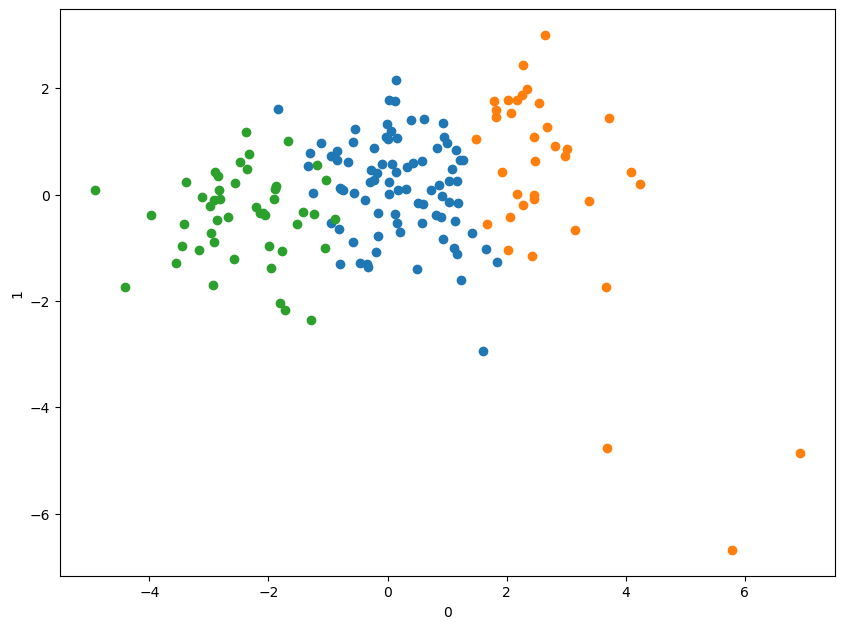

In [94]:
for k in range(K_pca):
        plt.scatter(Kmeans_PCA_final[k+1][:,0],Kmeans_PCA_final[k+1][:,1])

plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
plt.xlabel('0')
plt.ylabel('1')
plt.show()

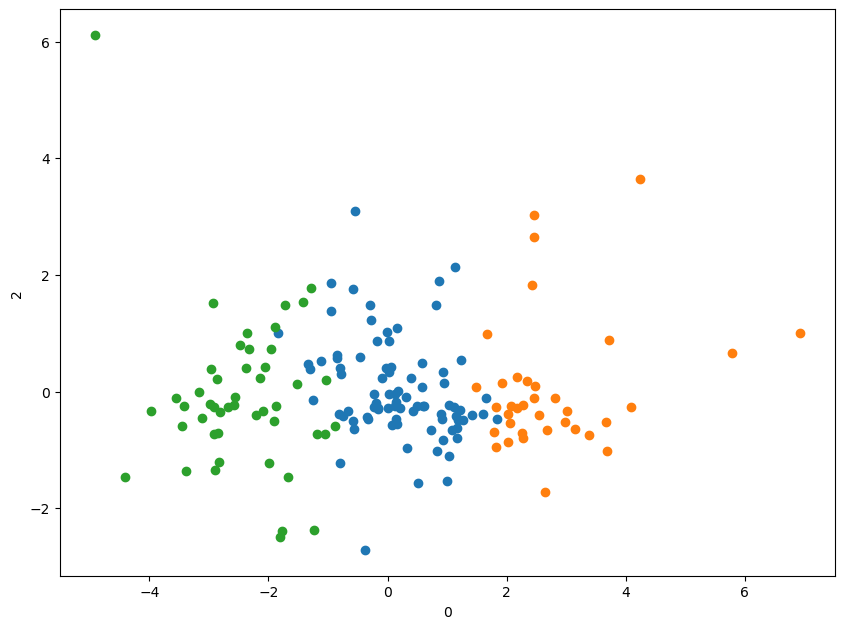

In [95]:
for k in range(K_pca):
        plt.scatter(Kmeans_PCA_final[k+1][:,0],Kmeans_PCA_final[k+1][:,2])

plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
plt.xlabel('0')
plt.ylabel('2')
plt.show()

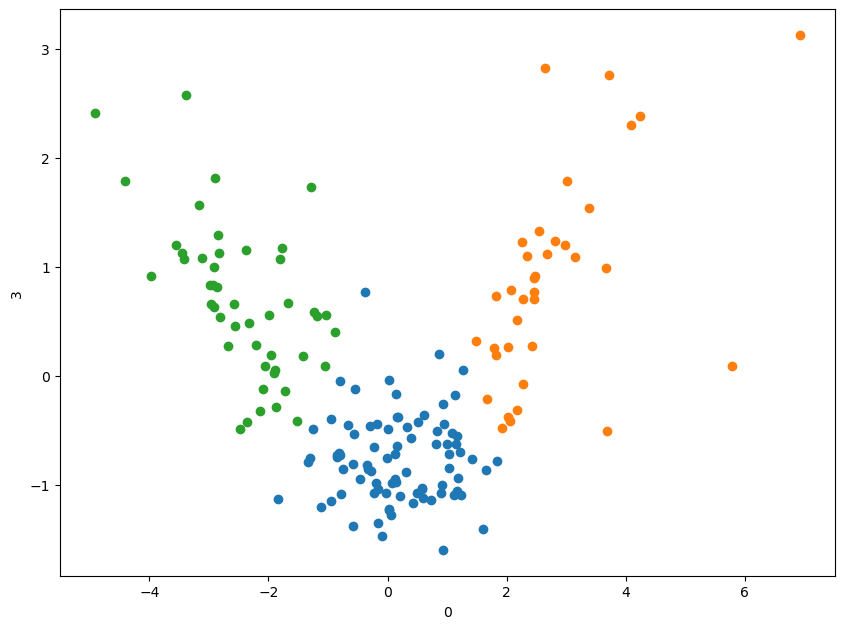

In [96]:
for k in range(K_pca):
        plt.scatter(Kmeans_PCA_final[k+1][:,0],Kmeans_PCA_final[k+1][:,3])

plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
plt.xlabel('0')
plt.ylabel('3')
plt.show()

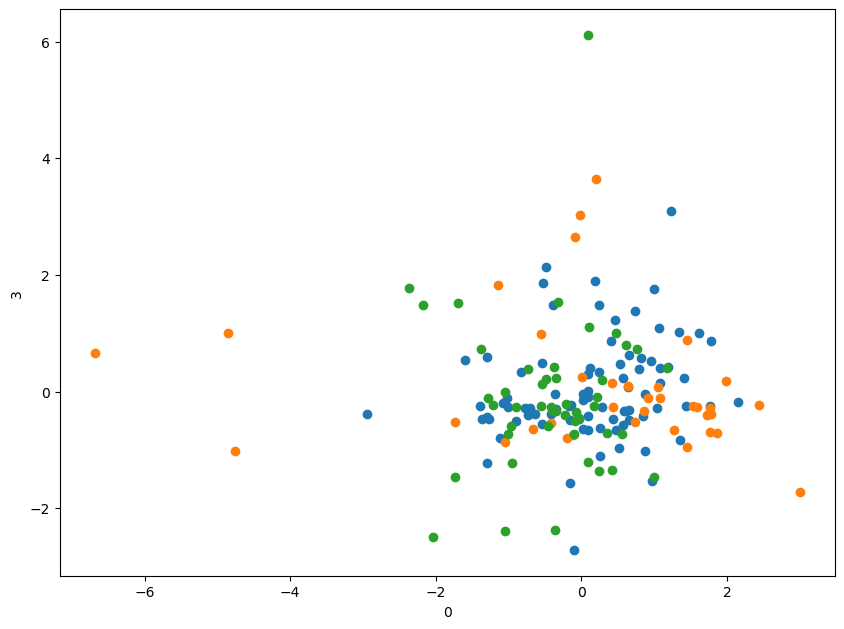

In [97]:
for k in range(K_pca):
        plt.scatter(Kmeans_PCA_final[k+1][:,1],Kmeans_PCA_final[k+1][:,2])

plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
plt.xlabel('0')
plt.ylabel('3')
plt.show()

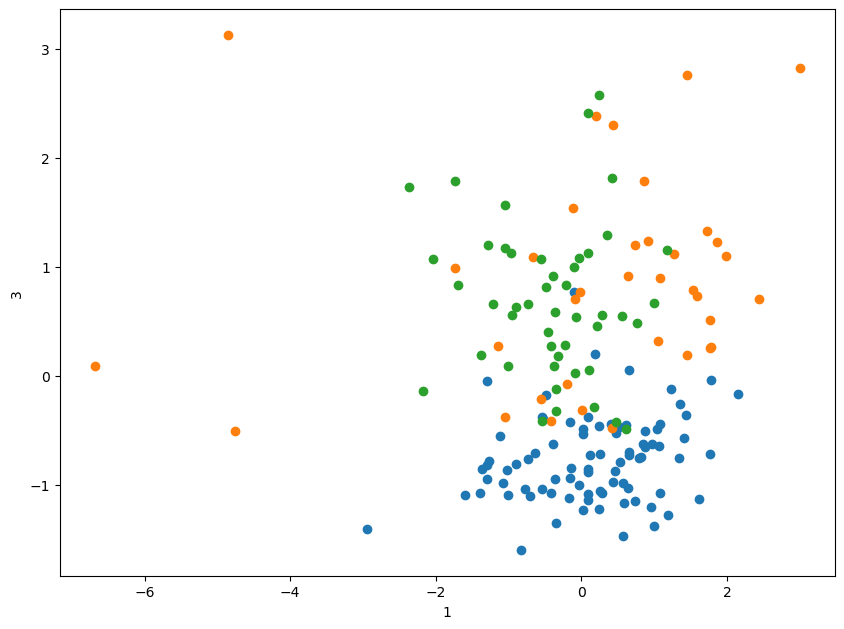

In [98]:
for k in range(K_pca):
        plt.scatter(Kmeans_PCA_final[k+1][:,1],Kmeans_PCA_final[k+1][:,3])

plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
plt.xlabel('1')
plt.ylabel('3')
plt.show()

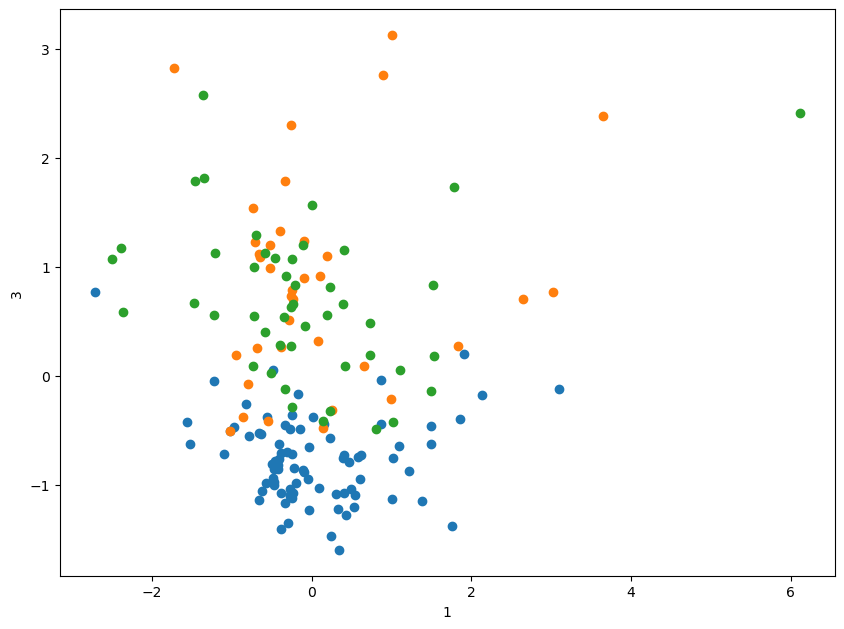

In [99]:
for k in range(K_pca):
        plt.scatter(Kmeans_PCA_final[k+1][:,2],Kmeans_PCA_final[k+1][:,3])

plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
plt.xlabel('1')
plt.ylabel('3')
plt.show()